# Project 2: Spam/Ham Prediction

In this project, you will use what you've learned in class to create a classifier that can distinguish spam emails from ham (non-spam) emails.

We'll walk you through a couple steps to get you started, but this project is almost entirely open-ended. Instead of providing you with a skeleton to fill in, we will evaluate your work based on your model's accuracy and your written responses in this notebook.

## Kaggle

This project is a bit different from the other assignments in this class because we are using Kaggle to evaluate your model's accuracy. Kaggle is a website that hosts machine learning competitions.

We've created a competition just for this project: https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3

Here's how submitting to Kaggle works:

1. You will create a classifier using the training dataset.
2. You will use your classifier to make predictions on the test dataset.
3. You will upload your predictions as a CSV to https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3
4. The website will tell you your accuracy on the test set. You may only do this twice a day. You must reach a test set accuracy of **88%** in order to get full credit for the Kaggle portion of the assignment.

(After the assignment ends, we will evaluate your accuracy on a private test set to ensure that you aren't overfitting to the test set.)

## Submission

This project has no ok tests (and no autograder). Instead, you will submit the following:

0. **Your notebook to OkPy**. You can do this by running the `ok.submit()` cell at the bottom of this notebook. Note that there is no autograder for this assignment so you will not receive autograder emails.
0. **Your notebook's written answers to GradeScope.** The cell to export the notebook is located at the bottom of this notebook. If you have trouble converting your notebook to PDF, you may upload your notebook to http://datahub.berkeley.edu/ and run the cell there.
0. **Your model's predictions on the test set to Kaggle**, a website that hosts machine learning competitions. Kaggle will output your your accuracy on the test set so that you will know whether you've met the accuracy threshold or not.

**To prevent you from fitting to the test set, you may only upload predictions to Kaggle twice per day.** This means you should start early. In addition, if you decide to pair with someone else, your group only gets two submissions per day (not four).

This project (notebook + Gradescope submissions) is officially due Friday, Dec 1 at 11:59:59pm since we can't make assignments due after classes end. However, we will accept submissions until **Monday, Dec 4 at 11:59:59pm** without using slip days. Submissions after Dec 4 will use 1 slip day each day after Dec 4. The Kaggle competition will remain open until **Saturday Dec 9 at 11:59:59pm**.

**No late Kaggle submissions will be accepted** since we've taken slip days into account when setting the Kaggle deadline. You will not use slip days for Kaggle submissions.

## Grading
Grading will be based on a number of set criteria, enumerated below:

Task | Description
--- | ---
Basic Classifier | You succesfully implement our guided basic logistic regression classifier.
EDA | You create four exploratory plots that help explain your feature choices.
Feature Selection | You explain and justify your feature selection process
Written Questions | You answer the written questions that we place throughout this notebook.
Kaggle Accuracy | Your model beats the prediction accuracy threshold of **88%**. This is attainable with a well-thought-out model.

**You are allowed to work in groups of 2 for this assignment!** If you decide to partner with someone else, make sure you do the following:

1. Have one person in the group invite the other on OkPy: https://okpy.org/cal/ds100/fa17/proj2/
1. Have one person in the group invite the other person on Gradescope.
1. Have one person in the group invite the other person on Kaggle: https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3

## Prizes

Although you need to reach 88% accuracy in order to get full credit, we will reward those that create great classifiers.

The top 10 students on the Kaggle leaderboard, evaluated by their score in the private test set will: 

1. Have bragging rights 
2. Be invited to attend a lunch at the Faculty Club, hosted by Professors Gonzalez and Nolan.

## Restrictions

While we want you to be creative with your models, we want to make it fair to students who are seeing these techniques for the first time.  As such, **you are only allowed to train logistic regression models and their regularized forms**.  This means no random forest, CART, neural nets, etc.  However, you are free to feature engineer to your heart's content.  Remember that domain knowledge is the third component of data science.

## Getting Started

In [1]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")

from IPython.display import display, Latex, Markdown, HTML, Javascript
from client.api.notebook import Notebook
ok = Notebook('proj2.ok')

Assignment: Project 2
OK, version v1.13.9



In [2]:
# Log into OkPy.
# You might need to change this to ok.auth(force=True) if you get an error
ok.auth(force=False)

Successfully logged in as bogeunchoi@berkeley.edu


For your convenience, run this cell to highlight the written response cells in light blue. Only the highlighted cells will be converted to the GradeScope PDF, so put your written answers there.

Unfortunately, you'll have to run this each time you open your notebook to highlight cells.

In [3]:
highlight_cells = '''
Jupyter.notebook.get_cells().map(function(cell) {
  var tags = cell.metadata.tags
  if (tags && tags.indexOf('written') >= 0)
    cell.element.css('background-color', '#efefff')
})
'''
display(Javascript(highlight_cells))

<IPython.core.display.Javascript object>

## Loading in the Data

The dataset consists of email messages and their labels (0 for ham, 1 for spam). The training set contains 8348 labeled examples, and the test set contains 1000 unlabeled examples.

Run the following cells to load in the data into DataFrames.

The `train` DataFrame contains labeled data that you will use to train your model. It contains three columns:

1. `id`: An identifier for the training example.
1. `subject`: The subject of the email
1. `email`: The text of the email.
1. `spam`: 1 if the email was spam, 0 if the email was ham (not spam).

The `test` DataFrame contains another set of 1000 unlabeled examples. You will predict labels for these examples and submit your predictions to Kaggle for evaluation.

In [4]:
train = pd.read_csv('train.csv')
# We lower case the emails to make them easier to work with
train['email'] = train['email'].str.lower()
train.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


In [5]:
test = pd.read_csv('test.csv')
test['email'] = test['email'].str.lower()
test.head()

,id,subject,email
0,0,Subject: CERT Advisory CA-2002-21 Vulnerabilit...,\n \n -----begin pgp signed message-----\n \n ...
1,1,Subject: ADV: Affordable Life Insurance ddbfk\n,low-cost term-life insurance!\n save up to 70%...
2,2,Subject: CAREER OPPORTUNITY. WORK FROM HOME\n,------=_nextpart_000_00a0_03e30a1a.b1804b54\n ...
3,3,Subject: Marriage makes both sexes happy\n,"url: http://www.newsisfree.com/click/-3,848315..."
4,4,Subject: Re: [SAtalk] SA very slow (hangs?) on...,on thursday 29 august 2002 16:39 cet mike burg...


### Question 1

In the cell below, print the text of the first ham and the first spam email in the training set. Then, discuss one thing you notice that is different between the two.

In [6]:
# Print the text of the first ham and the first spam emails. Then, fill in your response in the q01 variable:

print('HAM')
print(train.loc[0]['email'])
print('SPAM')
print(train.loc[2]['email'])

q01 = '''
The ham email has a url and date header with a text body while the spam email has HTML tags.
'''
display(Markdown(q01))

HAM
url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

SPAM
<html>
 <head>
 </head>
 <body>
 <font size=3d"4"><b> a man endowed with a 7-8" hammer is simply<br>
  better equipped than a man with a 5-6"hammer. <br>
 <br>would you rather have<br>more than enough to get the job done or fall =
 short. it's totally up<br>to you. our methods are guaranteed to increase y=
 our size by 1-3"<br> <a href=3d"http://209.163.187.47/cgi-bin/index.php?10=
 004">come in here and see how</a>
 </body>
 </html>
 
 
 




The ham email has a url and date header with a text body while the spam email has HTML tags.


## Our First Features

We would like to take the text of an email and predict whether the text is ham or spam. This is a *classification* problem, so we will use logistic regression to make a classifier.

Recall that the input to logistic regression is a matrix $X$ that contains numeric values only. Unfortunately, our data are text, not numbers. To address this, we can create numeric features derived from the email text and use those features for logistic regression.

Each row of $X$ is derived from one email example. Each column of $X$ is one feature. We'll guide you through creating a simple feature, and you'll create more interesting ones when you are trying to increase your accuracy.

### Question 2

Create a function called `words_in_text` that takes in a list of words and the text of an email. It outputs a pandas Series containing either a 0 or a 1 for each word in the list. The value of the Series should be 0 if the word doesn't appear in the text and 1 if the word does.

In [7]:
def words_in_text(words, text):
    '''
    Args:
        `words` (list of str): words to find
        `text` (str): string to search in
    
    Returns:
        Series containing either 0 or 1 for each word in words
        (0 if the word is not in text, 1 if the word is).
    '''
    list_o_nums = []
    for word in words:
        if (word in text):
            list_o_nums.append(1)
        else:
            list_o_nums.append(0)
    return pd.Series(list_o_nums)

# If these don't error, your function outputs the correct output for these examples
assert np.allclose(words_in_text(['hello'], 'hello world'),
                   [1])
assert np.allclose(words_in_text(['hello', 'bye', 'world'], 'hello world hello'),
                   [1, 0, 1])

### Question 3

Now, create a function called `words_in_texts` that takes in a list of words and a pandas Series of email texts. It should output a 2-dimensional NumPy matrix containing one row for each email text. The row should contain the output of `words_in_text` for each example. For example:

```python
>>> words_in_texts(['hello', 'bye', 'world'], pd.Series(['hello', 'hello world hello']))
array([[1, 0, 0],
       [1, 0, 1]])
```

You should be able to use the `.apply` and `.as_matrix` functions to implement this.

In [8]:
def words_in_texts(words, texts):
    '''
    Args:
        `words` (list of str): words to find
        `texts` (Series of str): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    item_df = texts.apply(lambda x: words_in_text(words, x))
    item_matrix = item_df.as_matrix()
    return item_matrix

# If these don't error, your function outputs the correct output for these examples
assert np.allclose(words_in_texts(['hello', 'bye', 'world'], pd.Series(['hello', 'hello world hello'])),
                   np.array([[1, 0, 0], [1, 0, 1]]))

## Classification

Notice that the output of `words_in_texts` is a numeric matrix containing features for each email. This means we can use it directly to train a classifier.

### Question 4

We've given you 5 words that might be useful as features to distinguish spam/ham emails. Use these words as well as the `train` DataFrame to create two NumPy arrays: `X_train` and `y_train`.

`X_train` should be a matrix of 0s and 1s created by using your `words_in_texts` function on all the emails in the training set.

`y_train` should be vector of the correct labels for each email in the training set.

In [9]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email'])
y_train = train['spam']

X_train[:5], y_train[:5]

(array([[0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0]]), 0    0
 1    0
 2    1
 3    0
 4    0
 Name: spam, dtype: int64)

In [10]:
X_train
X_train.shape

(8348, 5)

### Question 5

Now we have matrices we can give to scikit-learn! Using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier, train a logistic regression model using `X_train` and `y_train`. Then, output the accuracy of the model in the cell below. You should get an accuracy of around 0.7557.

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

clf.score(X_train, y_train)

0.75574988021082889

In [12]:
from sklearn.metrics import recall_score, precision_score

predictions = pd.Series(clf.predict(X_train))
wao = pd.Series.to_frame(predictions)
wao['true'] = y_train
wao.columns = ['predicted', 'true']

true_pos = wao[((wao['predicted'] == 1) & (wao['true'] == 1))].count()
true_neg = wao[((wao['predicted'] == 0) & (wao['true'] == 0))].count()
false_pos = wao[((wao['predicted'] == 0) & (wao['true'] == 1))].count()
false_neg = wao[((wao['predicted'] == 1) & (wao['true'] == 0))].count()

hams = wao[wao['true'] == 0].count()
spams = wao[wao['true'] == 1].count()

print(true_pos, true_neg, false_pos, false_neg)
print(hams, spams)

predicted    238
true         238
dtype: int64 predicted    6071
true         6071
dtype: int64 predicted    1902
true         1902
dtype: int64 predicted    137
true         137
dtype: int64
predicted    6208
true         6208
dtype: int64 predicted    2140
true         2140
dtype: int64


### Question 6

That doesn't seem too shabby! But the classifier you made above isn't as great as you might think. Recall that we have other ways of evaluating a classifier:

*Sensitivity* (also called *recall*) is the rate of true positives; in this case, the proportion of spam emails that are classified as spam.

*Specificity* (also called *precision*) is the rate of true negatives; in this case, the proportion of ham emails that are classified as ham.

Answer the following questions in the light blue cell below. You may create other cells for scratch work, but your final answers
must appear in the light blue cell.

0. Suppose we have a classifier that just predicts 0 (ham) for every email. What is its sensitivity? Its specificity?
0. Suppose we have a classifier that just predicts 0 (ham) for every email. What is its accuracy on the training set?
0. Our logistic regression classifier got 75% prediction accuracy (number of correct predictions / total). Why is this a poor accuracy?
0. What is the sensitivity of the logistic regression classifier above? The specificity? What kind of mistake is our classifier more likely to make: false positives or false negatives?
0. Given the word features we gave you above, name one reason this classifier is performing poorly.

0. The sensitivity would be 0 because there would be no spam emails that are classified as spam, since all emails are predicted as ham. The specificity would be 1 because all ham emails would be classified as ham.
0. It would be the proportion of ham emails to total emails in the training set, or 6208/8348 (0.74365117393). Since it only predicts ham, the ham emails are correctly predicted while the spam emails are incorrectly predicted.
0. Because it is barely more accurate than the above classifier of just predicting ham for each email, so the classifier can be a lot better.
0. The sensitivity is 238/2140 (the number of predicted spams over the real number of spams) and the precision is 6071/6208 (the number of predicted hams over the real number of hams). False positives seem like the more likely mistake that the classifier might make based on this.
0. One reason may be that using those certain key words may not be the best indicator of what a spam email is. For example, 'prescription' can be in both spam and ham emails, so it doesn't help the classifier much.

## Moving Forward

With this in mind, it is now your assignment to make your classifier more accurate. In particular, in order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

To prevent you from fitting to the test set, you may only upload predictions to Kaggle twice per day. This means you should start early!

Here are some ideas for improving your model:

1. Finding better features based on the email text. For example, simple features that typically work for emails are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether or not the email is a reply to an earlier email or a forwarded email. 
    1. Using bag-of-words or [td-idf](http://www.tfidf.com/).
1. Finding better words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. (To help you out, we've given you a set of [English stopwords](https://www.wikiwand.com/en/Stop_words) in `stopwords.csv`)
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g., the regularization parameter) to achieve higher accuracy. 

Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features. However, we want to make it fair to students who are seeing these techniques for the first time.  As such, **you are only allowed to train logistic regression models and their regularized forms**. This means no random forest, k-nearest-neighbors, neural nets, etc.

We will not give you a code skeleton to do this, so feel free to create as many cells as you need in order to tackle this task. However, you should show us your process as outlined here:

### EDA Process

In [13]:
train.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


In [14]:
spam_df = train[train['spam'] == 1].reset_index(drop=True)
ham_df = train[train['spam'] == 0].reset_index(drop=True)

spam_df['exclam_count'] = spam_df['email'].apply(lambda x: x.count('!'))
ham_df['exclam_count'] = ham_df['email'].apply(lambda x: x.count('!'))

spam_df['q_count'] = spam_df['email'].apply(lambda x: x.count('?'))
ham_df['q_count'] = ham_df['email'].apply(lambda x: x.count('?'))

spam_avg_exclam = spam_df['exclam_count'].mean()
ham_avg_exclam = ham_df['exclam_count'].mean()

spam_avg_q = spam_df['q_count'].mean()
ham_avg_q = ham_df['q_count'].mean()

print(spam_avg_exclam, ham_avg_exclam)
print(spam_avg_q, ham_avg_q)

6.4570093457943925 2.0968105670103094
2.364485981308411 3.2288981958762886


In [15]:
import re

def search_for_re(subject):
    if pd.isnull(subject):
        return 0
    if re.search(r"\sR[Ee]:\s", subject):
        return 0
    else:
        return 1
    
    
spam_df['re'] = spam_df['subject'].apply(lambda x: search_for_re(x))
ham_df['re'] = ham_df['subject'].apply(lambda x: search_for_re(x))

spam_re_count = spam_df.groupby('re').count()['id'][0]
spam_not_re_count = spam_df.groupby('re').count()['id'][1]
ham_re_count = ham_df.groupby('re').count()['id'][0]
ham_not_re_count = ham_df.groupby('re').count()['id'][1]

print(spam_re_count, spam_not_re_count)
print(ham_re_count, ham_not_re_count)

85 2055
3153 3055


In [16]:
example_ham = ham_df['email'][0]
list_o_words = re.split(r"[^a-zA-Z]+", example_ham)

print(example_ham)
print(list_o_words)

url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

['url', 'http', 'boingboing', 'net', 'date', 'not', 'supplied', 'arts', 'and', 'letters', 'daily', 'a', 'wonderful', 'and', 'dense', 'blog', 'has', 'folded', 'up', 'its', 'tent', 'due', 'to', 'the', 'bankruptcy', 'of', 'its', 'parent', 'company', 'a', 'l', 'daily', 'will', 'be', 'auctioned', 'off', 'by', 'the', 'receivers', 'link', 'discuss', 'thanks', 'misha', 'http', 'www', 'aldaily', 'com', 'http', 'www', 'quicktopic', 'com', 'boing', 'h', 'zlfterjnd', 'jf', '']


In [17]:
clean_text = re.sub(r"((url: http:\S+)|(date: .+\n)|(http.*)|(<.*?>))", "", example_ham)
word_list = re.split(r"[^a-zA-Z]+", clean_text)
word_list = list(filter(None, word_list))

print(word_list)

['arts', 'and', 'letters', 'daily', 'a', 'wonderful', 'and', 'dense', 'blog', 'has', 'folded', 'up', 'its', 'tent', 'due', 'to', 'the', 'bankruptcy', 'of', 'its', 'parent', 'company', 'a', 'l', 'daily', 'will', 'be', 'auctioned', 'off', 'by', 'the', 'receivers', 'link', 'discuss', 'thanks', 'misha']


In [18]:
def word_count(text):
    clean_text = re.sub(r"((url: http:\S+)|(date: .+\n)|(http.*)|(<.*?>))", "", text)
    word_list = re.split(r"[^a-zA-Z]+", clean_text)
    word_list = list(filter(None, word_list))
    return len(word_list)

spam_df['word_count'] = spam_df['email'].apply(lambda x: word_count(x))
ham_df['word_count'] = ham_df['email'].apply(lambda x: word_count(x))
ham_df.head()

,id,subject,email,spam,exclam_count,q_count,re,word_count
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0,1,0,1,36
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0,0,0,1,14
2,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0,0,1,1,235
3,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0,1,4,0,323
4,5,Subject: Five\n,url: http://diveintomark.org/archives/2002/10/...,0,0,1,1,60


In [19]:
from collections import Counter

ham_words = []
spam_words = []

for index, row in ham_df.iterrows():
    clean_text = re.sub(r"((url: http:\S+)|(date: .+\n)|(http.*)|(<.*?>))", "", row['email'])
    list_o_words = re.split(r"[^a-zA-Z]+", clean_text)
    list_o_words = list(filter(None, list_o_words))
    ham_words.append(list_o_words)

for index, row in spam_df.iterrows():
    clean_text = re.sub(r"((url: http:\S+)|(date: .+\n)|(http.*)|(<.*?>))", "", row['email'])
    list_o_words = re.split(r"[^a-zA-Z]+", clean_text)
    list_o_words = list(filter(None, list_o_words))
    spam_words.append(list_o_words)    

ham_words_flat = [item for sublist in ham_words for item in sublist]
spam_words_flat = [item for sublist in spam_words for item in sublist]

ham_word_count = Counter(ham_words_flat)
spam_word_count = Counter(spam_words_flat)

In [20]:
ham_dict = dict(ham_word_count)
spam_dict = dict(spam_word_count)

word_ratios = pd.DataFrame()

word_col = []
ham_count = []
spam_count = []
ham_spam_ratio = []

for key in ham_dict:
    if key in spam_dict:
        word_col.append(key)
        ham_count.append(ham_dict[key])
        spam_count.append(spam_dict[key])
        ham_spam_ratio.append(ham_dict[key]/spam_dict[key])
        
word_ratios['word'] = word_col
word_ratios['ham'] = ham_count
word_ratios['spam'] = spam_count
word_ratios['ratio'] = ham_spam_ratio

word_ratios_filtered = word_ratios[(word_ratios['ham'] >= 100) & (word_ratios['spam'] >= 100)]
word_ratios_filtered.sort_values(by=['ratio'], ascending=False, inplace=True)
word_ratios_filtered.reset_index(drop=True, inplace=True)
word_ratios_filtered.head()

/Users/Bogeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,word,ham,spam,ratio
0,said,1982,142,13.957746
1,file,1648,122,13.508197
2,users,2566,197,13.025381
3,linux,3976,331,12.012085
4,server,1230,108,11.388889


### Testing out features

In [21]:
train_test = train.iloc[0:2087]
train_test.reset_index(drop=True, inplace=True)

#top = train.head()
train_train = train.tail(6261)
train_train.reset_index(drop=True, inplace=True)
train_train.head()
#train_train = pd.concat([top,bottom])

,id,subject,email,spam
0,2087,Subject: Fwd: Accepting Credit Cards (Faq) [su...,\n if you want a your own no hassle credit ca...,1
1,2088,Subject: RE: Your Bank Account Information \n,a powerhouse gifting program you don't want to...,1
2,2089,Subject: Saddam set to let inspectors in\n,"url: http://www.newsisfree.com/click/-2,841779...",0
3,2090,Subject: Re: revocation of grlygrl201@\n,bitbitch@magnesium.net wrote:\n > well beberg...,0
4,2091,Subject: YOU TO CAN MAKE---THOUSANDS PER WEEK-...,\n this is a multipart mime message.\n \n --= ...,1


In [22]:
def ham_in_text(words, text):
    list_o_nums = []
    for word in words:
        if (word in text):
            list_o_nums.append(0)
        else:
            list_o_nums.append(1)
    return pd.Series(list_o_nums)

def ham_in_texts(words, texts):
    item_df = texts.apply(lambda x: ham_in_text(words, x))
    item_matrix = item_df.as_matrix()
    return item_matrix

def spam_in_text(words, text):
    list_o_nums = []
    for word in words:
        if (word in text):
            list_o_nums.append(1)
        else:
            list_o_nums.append(0)
    return pd.Series(list_o_nums)

def spam_in_texts(words, texts):
    item_df = texts.apply(lambda x: spam_in_text(words, x))
    item_matrix = item_df.as_matrix()
    return item_matrix

def word_count(text):
    clean_text = re.sub(r"((url: http:\S+)|(date: .+\n)|(http.*)|(<.*?>))", "", text)
    word_list = re.split(r"[^a-zA-Z]+", clean_text)
    word_list = list(filter(None, word_list))
    return len(word_list)

In [23]:
hams = word_ratios_filtered['word'].iloc[0:250]
spams = word_ratios_filtered['word'].iloc[-250:len(word_ratios_filtered)]

train_train['exclam_count'] = train_train['email'].apply(lambda x: x.count('!'))
train_train['re'] = train_train['subject'].apply(lambda x: search_for_re(x))
train_train['word_count'] = train_train['email'].apply(lambda x: word_count(x))

ham_matrix = ham_in_texts(hams, train_train['email'])
spam_matrix = spam_in_texts(spams, train_train['email'])
word_matrix = np.concatenate((ham_matrix, spam_matrix), axis=1)
feat_matrix = train_train[['exclam_count', 're', 'word_count']]
X_matrix = np.concatenate((word_matrix, feat_matrix), axis=1)

y_col = train_train['spam']
X_matrix.shape

/Users/Bogeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Bogeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Bogeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

(6261, 503)

In [24]:
train_test['exclam_count'] = train_test['email'].apply(lambda x: x.count('!'))
train_test['re'] = train_test['subject'].apply(lambda x: search_for_re(x))
train_test['word_count'] = train_test['email'].apply(lambda x: word_count(x))

test_ham_matrix = ham_in_texts(hams, train_test['email'])
test_spam_matrix = spam_in_texts(spams, train_test['email'])
test_word_matrix = np.concatenate((test_ham_matrix, test_spam_matrix), axis=1)
test_feat_matrix = train_test[['exclam_count', 're', 'word_count']]
test_matrix = np.concatenate((test_word_matrix, test_feat_matrix), axis=1)

/Users/Bogeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Bogeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Bogeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [25]:
clf_test = LogisticRegression()
clf_test.fit(X_matrix, y_col)
clf_test.score(test_matrix, train_test['spam'])

0.98322951605174891

### Feature/Model Selection Process

In this following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

1. Basically I just tried out patterns that I found from the EDA stage. After trying each pattern individually, I then combined them to see how they work together, and from that I was able to get a pretty good model.
1. The thing that worked the best were the feature words, which contributed a lot to the model. Other features such as the number of exclamation points and word count didn't work as well, but they still add some accuracy to the model.
1. I was surprised at a few words that favored ham/spam emails. For instance, "marketing" for spam and "spam" for ham. Another thing I was a bit surprised at is how the number of question marks aren't that different between spam and ham emails.

### EDA

In the four light blue cells below, show us four different visualizations that you used to select features for your model. Each cell should output:

1. A plot showing something meaningful about the data that helped you during feature / model selection.
2. 2-3 sentences describing what you plotted and what its implications are for your features.

Feel to create as many plots as you want in your process of feature selection, but select four interesting ones for the cells below.

You should not show us more than one visualization for the same type of feature. For example, don't show us a bar chart of the number of emails that contain the word "hello" and a bar chart of the number of emails that contain the word "world". Each visualization should be conceptually distinct.

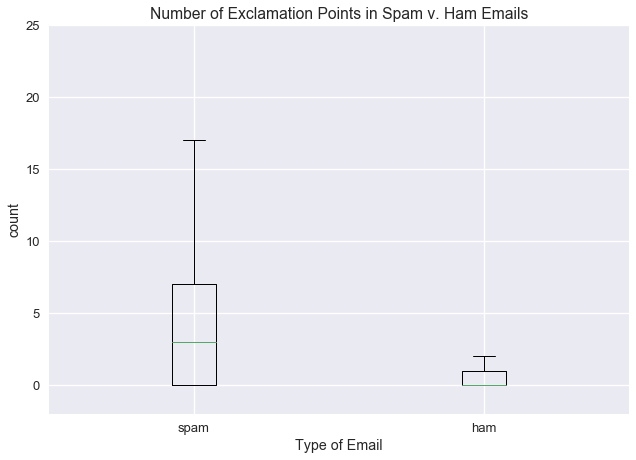

In [26]:
# This is the first graded EDA cell
axes = plt.gca()
axes.set_ylim([-2,25])

fig = plt.boxplot([spam_df['exclam_count'], ham_df['exclam_count']])
plt.xticks([1, 2], ['spam', 'ham'])

plt.title('Number of Exclamation Points in Spam v. Ham Emails')
plt.xlabel('Type of Email')
plt.ylabel('count')

plt.show()

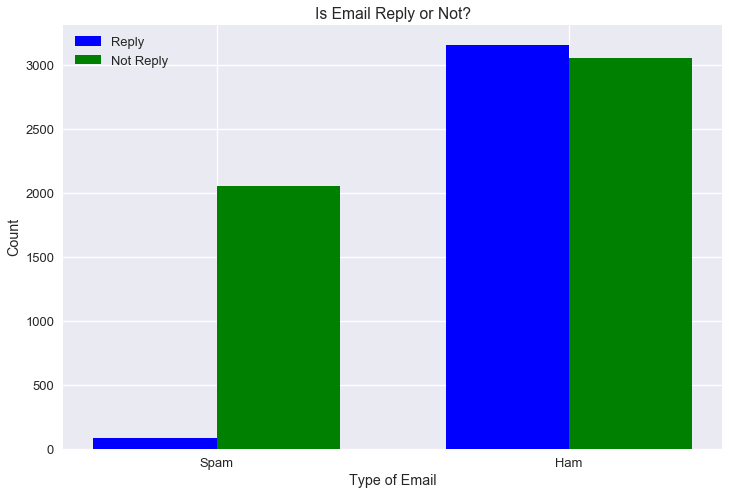

In [27]:
# This is the second graded EDA cell
re_data = (spam_re_count, ham_re_count)
not_re_data = (spam_not_re_count, ham_not_re_count)
index = np.arange(2)

rects1 = plt.bar(index, re_data, 0.35,
                 color='b',
                 label='Reply')
 
rects2 = plt.bar(index + 0.35, not_re_data, 0.35,
                 color='g',
                 label='Not Reply')

plt.xlabel('Type of Email')
plt.ylabel('Count')
plt.title('Is Email Reply or Not?')
plt.xticks(index + 0.35/2, ('Spam', 'Ham'))
plt.legend()
 
plt.tight_layout()
plt.show()

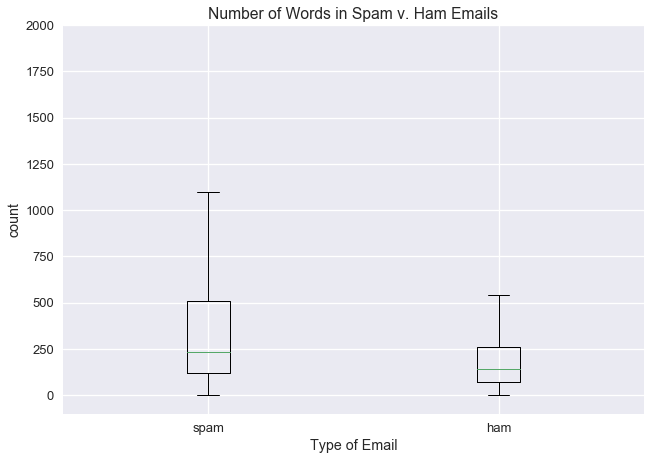

In [28]:
# This is the third graded EDA cell
plot = plt.gca()
plot.set_ylim([-100,2000])

fig = plt.boxplot([spam_df['word_count'], ham_df['word_count']])
plt.xticks([1, 2], ['spam', 'ham'])

plt.title('Number of Words in Spam v. Ham Emails')
plt.xlabel('Type of Email')
plt.ylabel('count')

plt.show()

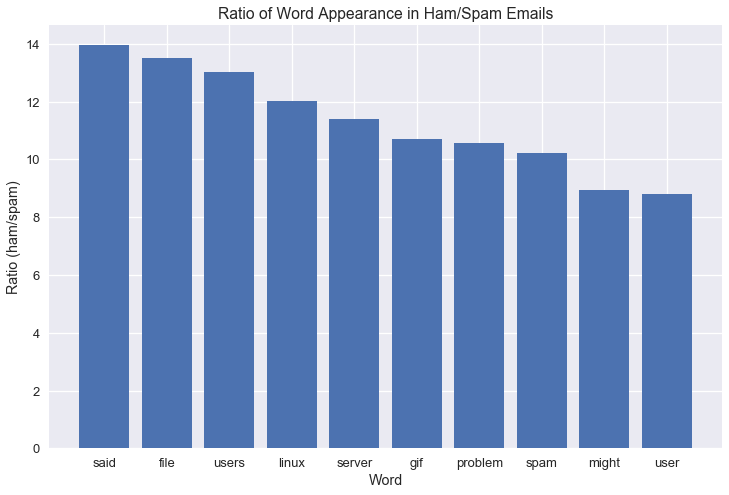

In [29]:
# This is the fourth graded EDA cell
# Explanation: The y-axis is a ratio of the number of times a word appears in a ham email compared to a spam email.
# For example, if ratio = 5 then the word is 5 times more likely to be in a ham email than a spam email
index_word = np.arange(10)

plt.bar(index_word, word_ratios_filtered.head(10)['ratio'])
plt.xlabel('Word')
plt.ylabel('Ratio (ham/spam)')
plt.title('Ratio of Word Appearance in Ham/Spam Emails')
plt.xticks(index_word, word_ratios_filtered.head(10)['word'])
 
plt.tight_layout()
plt.show()

### Making an ROC Curve

It turns out that there's a tradeoff between sensitivity and specificity. In most cases we won't be able to get perfect sensitivity and specificity, so we have to select which of two we value more. For example, in the case of cancer screenings we value specificity more because false negatives are comparatively worse than false positives — a false negative means that a patient might not discover a disease until it's too late to treat, while a false positive means that a patient will probably have to take another screening.

Recall that logistic regression calculates the probability that an example belongs to a certain class. Then, to classify an example we say that an email is spam if our classifier gives it >=0.5 probability of being spam. However, we can adjust that cutoff: we can say that an email is spam only if our classifier gives it >=0.7 probability of being spam, for example. This is how we can trade off sensitivity and specificity.

The ROC (receiver operating charactistic) curve shows this trade off for each possible cutoff probability. We will discuss this during lecture, and you can also read [this blog post for more information.](https://www.theanalysisfactor.com/what-is-an-roc-curve/).

In the light blue cell below, plot the ROC curve for your final classifier (the one you use to make predictions for Kaggle).

In [30]:
train['exclam_count'] = train['email'].apply(lambda x: x.count('!'))
train['re'] = train['subject'].apply(lambda x: search_for_re(x))
train['word_count'] = train['email'].apply(lambda x: word_count(x))

hams_matrix = ham_in_texts(hams, train['email'])
spams_matrix = spam_in_texts(spams, train['email'])
words_matrix = np.concatenate((hams_matrix, spams_matrix), axis=1)
feature_matrix = train[['exclam_count', 're', 'word_count']]
X_train = np.concatenate((words_matrix, feature_matrix), axis=1)

y = train['spam']

test['exclam_count'] = test['email'].apply(lambda x: x.count('!'))
test['re'] = test['subject'].apply(lambda x: search_for_re(x))
test['word_count'] = test['email'].apply(lambda x: word_count(x))

test_hams_matrix = ham_in_texts(hams, test['email'])
test_spams_matrix = spam_in_texts(spams, test['email'])
test_words_matrix = np.concatenate((test_hams_matrix, test_spams_matrix), axis=1)
test_feature_matrix = test[['exclam_count', 're', 'word_count']]
X_test = np.concatenate((test_words_matrix, test_feature_matrix), axis=1)

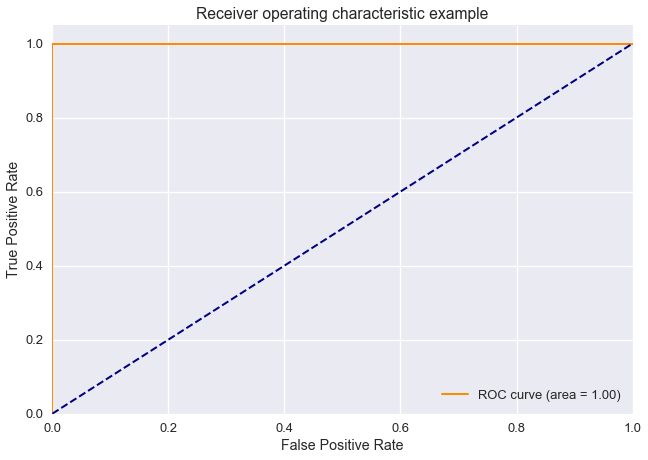

In [32]:
from sklearn.metrics import roc_curve, auc

# Note that you'll want to use the .predict_proba(...) method for your classifier
# instead of .predict(...) so you get probabilities, not classes
classifier = LogisticRegression()
classifier.fit(X_train, y)
actual = classifier.predict(X_test)
predictions = [x[1] for x in classifier.predict_proba(X_test)]

y_score = classifier.fit(X_train, y).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y)):
    fpr[i], tpr[i], _ = roc_curve(actual, predictions)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(actual, predictions)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

The code below assumes that you've saved your predictions in a 1-dimensional array called `test_predictions`.

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3

In [33]:
from datetime import datetime

classifier = LogisticRegression()
classifier.fit(X_train, y)
test_predictions = classifier.predict(X_test)

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.
assert isinstance(test_predictions, np.ndarray)
assert test_predictions.shape == (1000, )

submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])

timestamp = datetime.isoformat(datetime.now()).split(".")[0]

submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)
print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2017-12-03T21:02:01.csv.
You may now upload this CSV file to Kaggle for scoring.


## Submission

Run the cell below to submit your notebook to OkPy:

In [34]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj2.ipynb'.
Submit... 100% complete
Submission successful for user: bogeunchoi@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/proj2/submissions/RgLDZY



Now, run this cell to create a PDF to upload to Gradescope.

In [35]:
!pip install -U gs100
from gs100 import convert
# Change the zoom argument if your font size is too small
convert('proj2.ipynb', num_questions=8, zoom=1)

Requirement already up-to-date: gs100 in /Users/Bogeun/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: nbformat>=4 in /Users/Bogeun/anaconda3/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: PyPDF2>=1.26 in /Users/Bogeun/anaconda3/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: pdfkit>=0.6 in /Users/Bogeun/anaconda3/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: toolz>=0.8 in /Users/Bogeun/anaconda3/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: beautifulsoup4>=4 in /Users/Bogeun/anaconda3/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: nbconvert>=5 in /Users/Bogeun/anaconda3/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: traitlets>=4.1 in /Users/Bogeun/anaconda3/lib/python3.6/site-packages (from nbformat>=4->gs100)
Requirement already up-to-date: jsonschema!=2.5.0,>=2.4 in /Users/Bogeun/anaconda3/lib/python3.6/sit

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj2.ipynb'.
Created question_pdfs/q_email.pdf
Created question_pdfs/q01.pdf
Created question_pdfs/q06.pdf
Created question_pdfs/q_feature.pdf
Created question_pdfs/q_eda1.pdf
Created question_pdfs/q_eda2.pdf
Created question_pdfs/q_eda3.pdf
Created question_pdfs/q_eda4.pdf
Created question_pdfs/q_roc.pdf


If the font size of your PDF is too small/large, change the value of the zoom argument when calling convert. For example, setting zoom=2 makes everything twice as big.


Make sure to upload your PDF now. Otherwise, your written questions won't be graded.